A simple ML workflow:

1. Problem Scoping
2. Data Acquisition
3. EDA a. clean data b. visualized data (you already learned EDA / cleaning)
4. Choose a model– e.g., Decision Tree for classification.
5. Train a. Train/Test split b. Fit the model on training data
6. Test  a. Make predictions on test data b. Compute performance (accuracy, etc.) c. Reiterate based on performance

## **Predict house prices based on house parameters**

1. predict the house prices 
    -The problem is worth solving because real estate professionals often need help in evaluating the prices of properties.
    a. 

2. Data acquisition:
    - use the in-built sci-kit learn dataset
    a. secondary sources - Kaggle, websites, github etc
    b. API

3. EDA-  
    - clean dataset - is clean already - but still just recall some cleaning techniques
    - visualized a little 

4. Choose a model:
    - look into data, we infer that it is a regression problem (Prices are a continuos value)
    - Linear Regression (we are using it here, because it a very simple model)
    - Next iteration, Logistic Regression (We will observe this model too. It works on classifications problems tho)
    - Decision trees
    
5. Training
    - Train/Test split of 8:2 - 80% data for training
    - Fit data into the model, model learns the patterns in data

6. Testing
    - Make predictions
    - Observe performance using evaluation metrics
    - Regression evaluation metrics - R2 score, and Mean Absolute Error
    
7. Improve performance
    - Reiterate based on performance
        a.change the split ratio
        b.change the model Hyper parameters
        c.try different model
        d.EDA again, and check whether data is perfect for the model
        e.Data acquisition again, add more data, or replace data set


Resources for the notebook:

https://scikit-learn.org/stable/datasets/real_world.html


**Step 1: Problem Scoping**
    - write about it

**Step 2: Data Acquisition**

https://www.kaggle.com/datasets/camnugent/california-housing-prices

a very quick way of getting data from kaggle

# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = ""

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "camnugent/california-housing-prices",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)


In [281]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing

import matplotlib.pyplot as plt
import seaborn as sns

#machine learning
from sklearn.linear_model import LinearRegression, LogisticRegression
#model training
from sklearn.model_selection import train_test_split
#model evaluation
from sklearn.metrics import mean_absolute_error,r2_score

In [282]:
housing_data = fetch_california_housing()
housing_data.feature_names

#input features
df = pd.DataFrame(housing_data.data, columns= housing_data.feature_names)

#target features
df['Price'] = housing_data.target

#check the dataset
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


About the Dataset:

MedInc - Median income of the households in the block - 10s thousands
HouseAge - The age of house - years
AveRooms - # of Rooms
AveBedrms - # of Bed Rooms
Population - # of people within the block of the property
AveOccup - # of people living in the housing
Latitude - Location cordinates Latitude
Longitude - Location cordinates Longitude
HousePrice - Will mention the price of the property - 10s thousands

Exercise:
-turn the price columns into 10 thousand units, i.e. multiply all records with 10 thousand
-turn them back to ones units

In [283]:
new_df = df.copy()

new_df['Price_000'] = new_df['Price'] * 10000

In [ ]:
new_df['Price_n'] = new_df['Price_000'] / 10000
new_df.head()

In [287]:
df.shape

(20640, 9)

In [ ]:
df.info() #method. ## df.dtypes

In [ ]:
df.describe() #method

In [ ]:
df.isnull().sum()

No cleaning needed. Already cleaned.

Visualizations

In [ ]:
#specify the defaults for visualizations

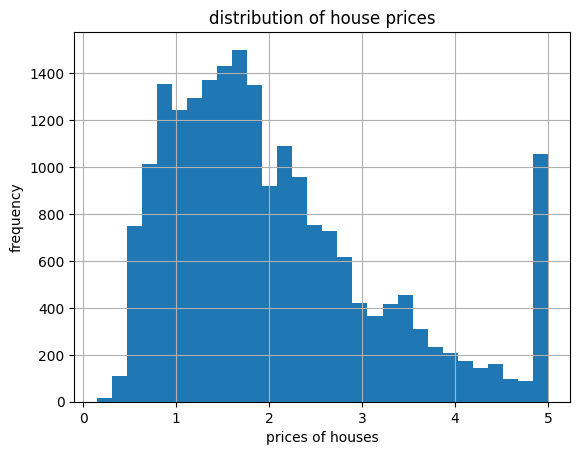

In [ ]:
plt.hist(df['Price'], bins=30);

plt.title('distribution of house prices')
plt.xlabel('prices of houses')
plt.ylabel('frequency')
plt.grid()
plt.show()

#plt.legend()

In [ ]:
#df.corr()

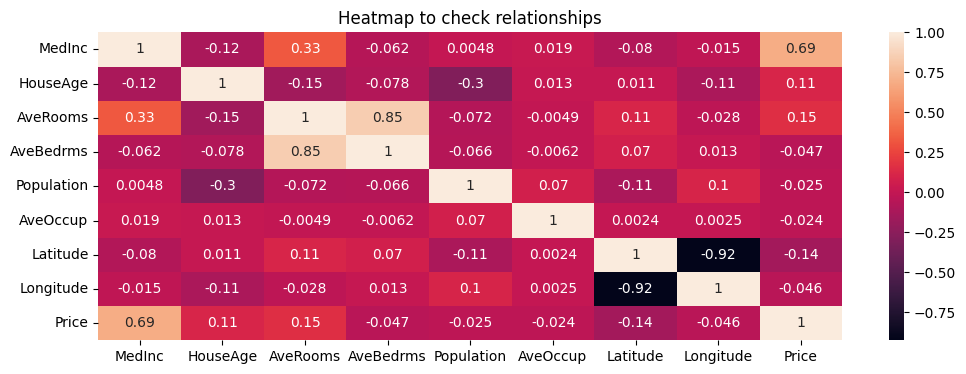

In [289]:
#exploring
#i am trying to know about the important features of the dataset

plt.figure(figsize=(12,4))
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap to check relationships')
plt.show()

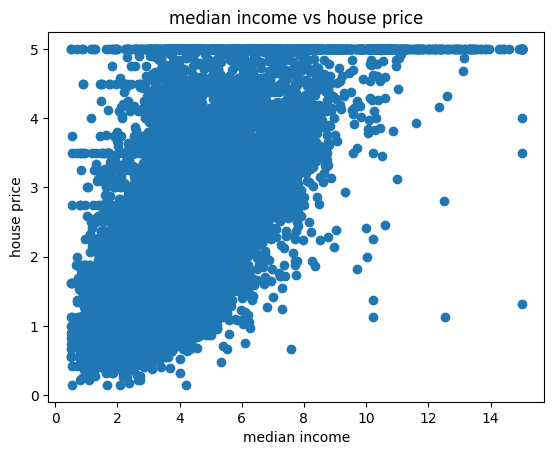

In [ ]:
plt.scatter(df['MedInc'], df['Price'])

plt.title('median income vs house price')
plt.xlabel('median income')
plt.ylabel('house price')
plt.show()

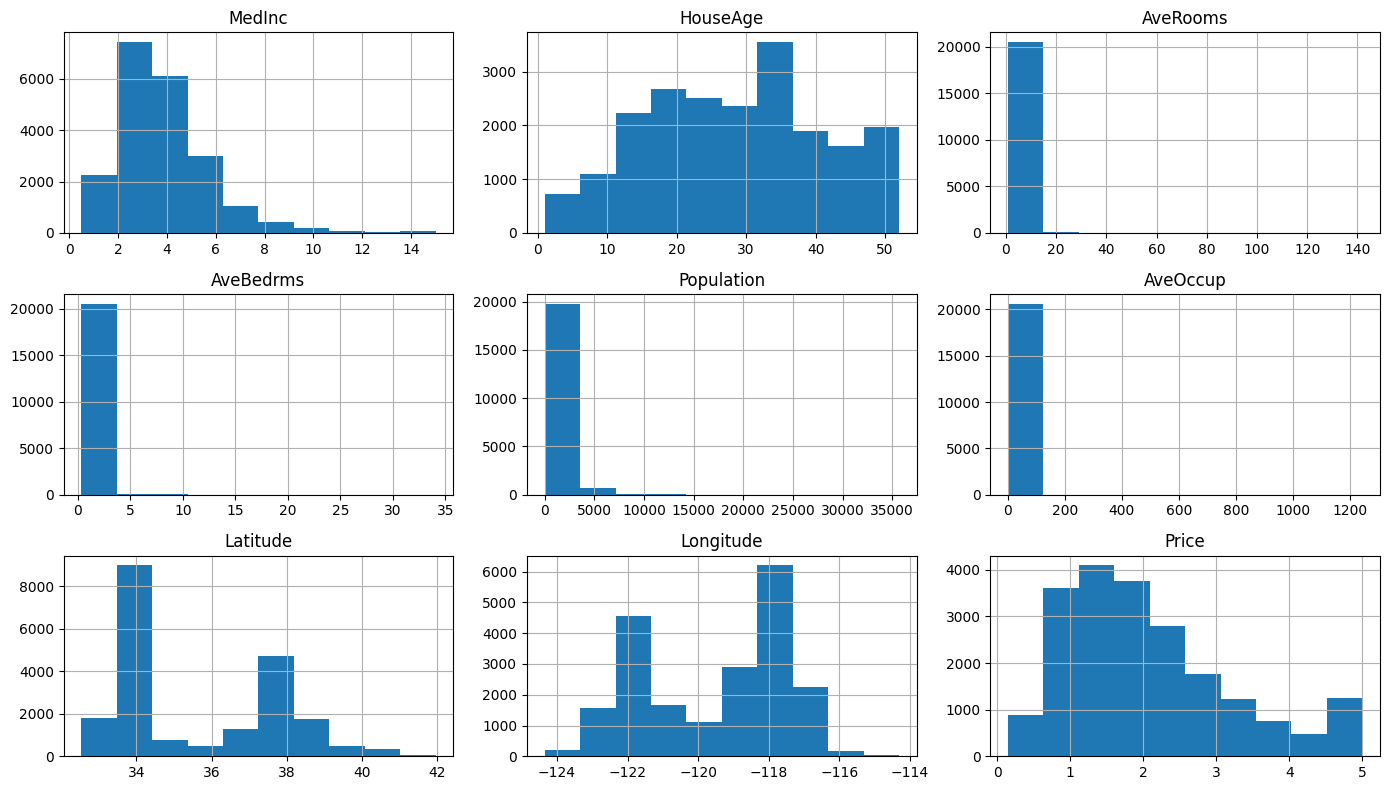

In [239]:
df.hist(figsize=(14, 8))
plt.tight_layout()

**Insights**

Insights needed for machine learning later

Exercise

-To make better visualizations
-Get more insights and record them
-To create all the visualization in a single plot, using subplot and figsize to manipulate visualizations


**Step 4: Choosing the Model**

    - Choosing Linear Regression

    - Linear regression 
    - how it works

In [240]:
model = LinearRegression()
model

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

**Step 5: Training**

    -Train Test Split of data
    -Fit the model with data

In [290]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [241]:
housing_data['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [291]:
# input features
X = df[['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']]
# X = df[['MedInc',	'HouseAge',	'AveRooms'	,'Latitude']]

# target features
y = df['Price']

In [292]:
# first 15k for training
# iloc

X_train = X.iloc[0:15000]
y_train = y.iloc[0:15000]

# rest for testing
X_test = X.iloc[15000:]
y_test = y.iloc[15000:]

# X = df.housing_data
# y = df.housing_target  

# X , y = df.housing_data, df.housing_target
# y

In [244]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# seed - in random package??
# replicate the result

In [245]:
X_train.shape
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80


In [ ]:
#fit the data in the model

model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


LinearRegression()
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [ ]:
# check which features came to be the most important for the model

feature_importance = pd.DataFrame({ 
'Features': housing_data.feature_names,
#'Features': ['MedInc',	'HouseAge',	'AveRooms'	,'Latitude'], 
'Model_Coefficients': model.coef_
}).sort_values('Model_Coefficients', ascending=False)
feature_importance 

feature_importance
#how much weight was assigned to each feature

,Features,Model_Coefficients
3,AveBedrms,0.783145
0,MedInc,0.448675
1,HouseAge,0.009724
4,Population,-0.000002
5,AveOccup,-0.003526
2,AveRooms,-0.123323
6,Latitude,-0.419792
7,Longitude,-0.433708


**Step 6: Testing**

- Make predictions
- Evaluation - Calculate the performance of the model

In [297]:
# model.predict([[3.2596,	33.0,	5.017657,	1.006421,	2300.0,	3.691814,	32.71,	-117.03]])

y_predict1 = model.predict(X_test)
y_predict1

array([2.10811155, 1.31896428, 1.14457107, ..., 0.15144086, 0.30610801,
       0.5096995 ], shape=(5640,))

In [ ]:
# the model, does not know anything about these
y_test, X_test

(20046    0.47700
 3024     0.45800
 15663    5.00001
 20484    2.18600
 9814     2.78000
           ...   
 15362    2.63300
 16623    2.66800
 18086    5.00001
 2144     0.72300
 3665     1.51500
 Name: Price, Length: 4128, dtype: float64,
        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 20046  1.6812      25.0  4.192201   1.022284      1392.0  3.877437     36.06   
 3024   2.5313      30.0  5.039384   1.193493      1565.0  2.679795     35.14   
 15663  3.4801      52.0  3.977155   1.185877      1310.0  1.360332     37.80   
 20484  5.7376      17.0  6.163636   1.020202      1705.0  3.444444     34.28   
 9814   3.7250      34.0  5.492991   1.028037      1063.0  2.483645     36.62   
 ...       ...       ...       ...        ...         ...       ...       ...   
 15362  4.6050      16.0  7.002212   1.066372      1351.0  2.988938     33.36   
 16623  2.7266      28.0  6.131915   1.256738      1650.0  2.340426     35.36   
 18086  9.2298      25.0  7.2

In [298]:
model.predict([[8.3252,     41.0, 6.984127, 1.023810, 322.0, 2.555556, 37.88,           -122.23],
               [3.2596 ,	33.0,	5.017657,	1.006421,	2300.0	,3.691814	,32.71,	-117.03],
               [3.2596 ,	33.0,	5.017657,	1.006421,	2300.0	,3.691814	,32.71,	-117.03],
               [3.2596 ,	33.0,	5.017657,	1.006421,	2300.0	,3.691814	,32.71,	-117.03]])

/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.15194306, 1.93725874, 1.93725874, 1.93725874])

**Evaluation**

In [ ]:
r2 = r2_score(y_test, y_predict) #0.575
r2

mae = mean_absolute_error(y_test, y_predict) #0.53
mae

0.533200130495655

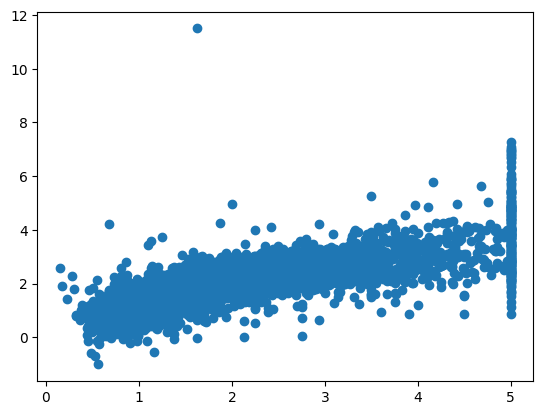

In [252]:
plt.scatter(y_test, y_predict);

**for iris data**

### Identification of flower species based on flower measurement

1. predict the species of iris flower based on flower physical measurement
    -problem is worth solving because the flower species are very hard to identify even for experts

2. Data acquisition:
    - use the in-built sci-kit learn dataset
    - visualize a bit

3. EDA-  
    - clean dataset - is clean already - but still just recall some cleaning techniques
    - visualized a little

4. Choose a model:
    - look into data, we infer that it is a Classification problem
    - Linear Regression ()
    - next iteration, Logistic Regression